In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [10]:
df = pd.read_excel ('ENB2012_data.xlsx')

In [11]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


### Check if there is any nan value

In [13]:
df.isnull().sum().any()

False

In [38]:
# Okay. There is no empty value.

### See the stats of all columns 

In [14]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Check if there is any outlier in each column using boxplot

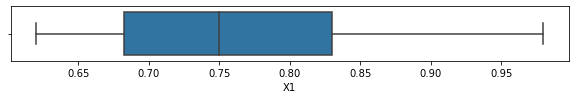

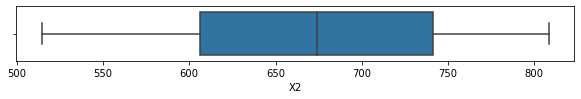

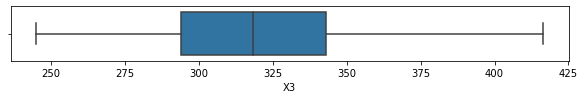

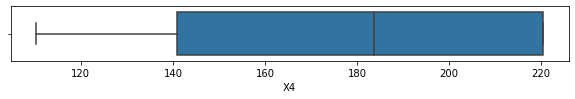

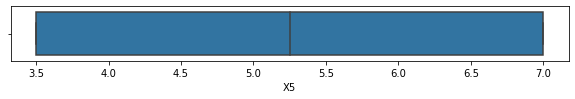

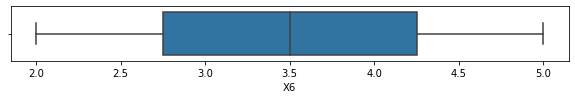

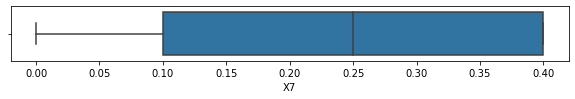

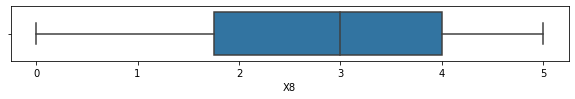

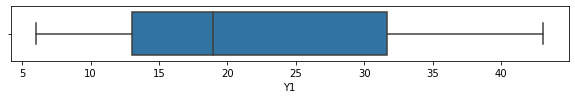

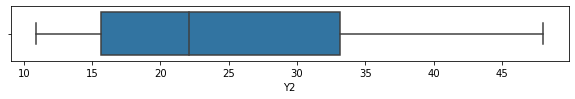

In [15]:
for column in df:
        plt.figure(figsize=(10,1))
        sns.boxplot(data=df, x=column)

In [41]:
# It seems there is no outlier.

### See the correlations

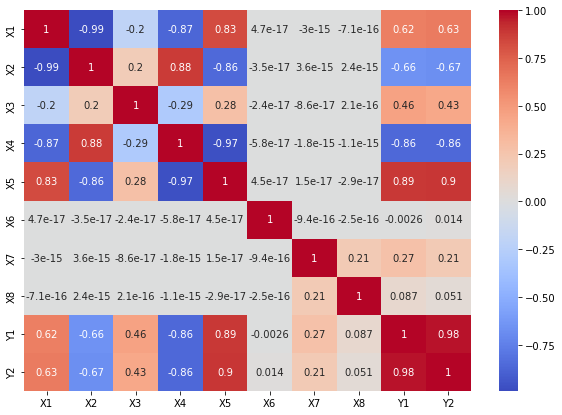

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2g', annot=True);

In [43]:
# X4, X2, X5 and X1 have strong correlations with Y1 and Y2 
# X6 has no effect on Y columns (very weak corr)
# X6, X7 and X8 have weak corr with other columns

In [52]:
# X1 and X2 highly correlated (negative)
# y1 and y2 highly correlated (positive)

### Decide categoric and which are numeric columns

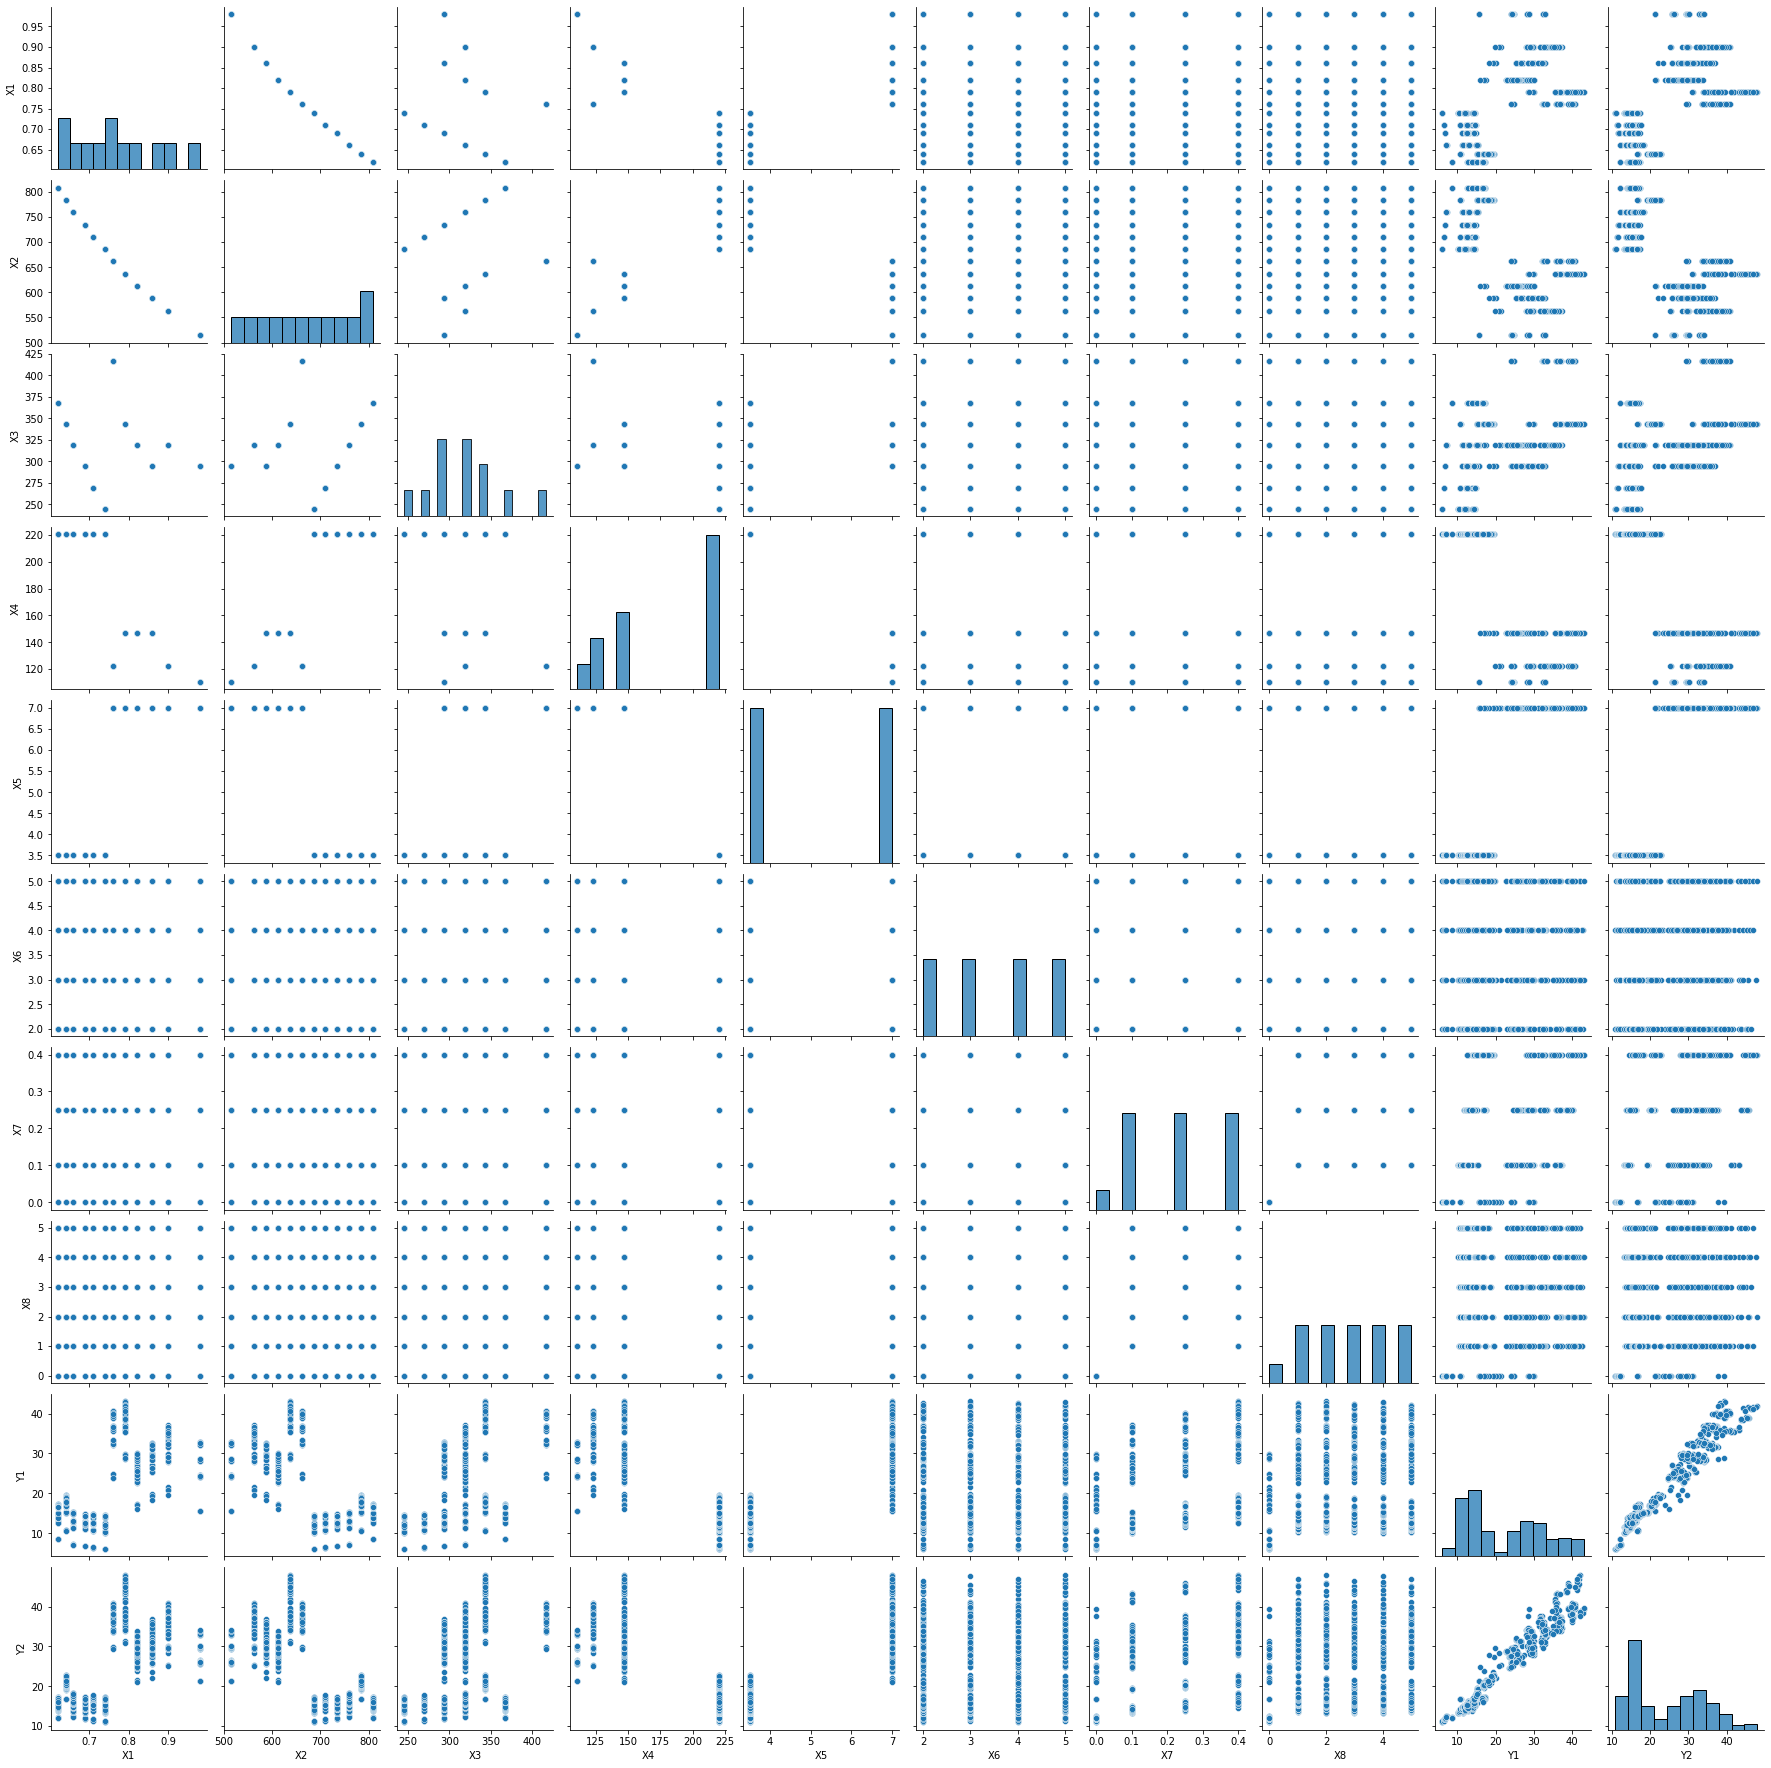

In [17]:
sns.pairplot(df);

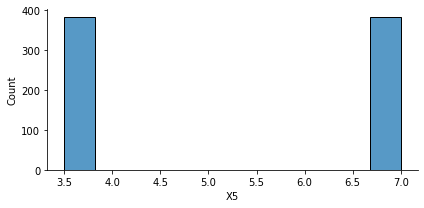

In [18]:
# Distribution of X5 column is strange. Let's plot it on a single chart.
sns.displot(df.X5, height=3, aspect =2);

In [ ]:
# Actually all columns are numeric. However maybe we should consider X5 column as a categoric column.
# Because X5 has only two different values. 

In [19]:
df.X5.unique()

array([7. , 3.5])

### Hypothesis Tests for numeric columns

<AxesSubplot:>

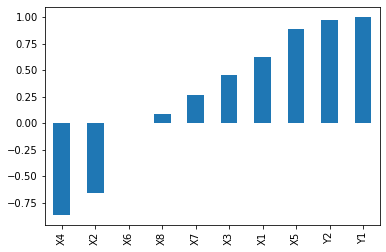

In [20]:
df.corr()['Y1'].sort_values().plot.bar()

In [22]:
from scipy import stats

In [46]:
# For numeric columns : correlation test (pearsonr). (X4)

In [ ]:
# test if X4 has strong correlations with Y1.

In [ ]:
# Ho : Correlation coefficient is equal to zero in the total population (X4 and Y1)
# Ha : Correlation coefficient is NOT equal to zero in the total population (X4 and Y1)

In [23]:
stats.pearsonr(df.Y1, df.X4)

(-0.8618280515790431, 4.91742201352266e-228)

In [229]:
# Decision : Reject the Ho. There is a significant correlation between Y1 and X1 (r = -0.86).
# p value is too small.
# Most probably X1 columns is an important feature. We will see this during feature importance phase.

In [49]:
# Let's make the same test for X6 column

In [51]:
# Ho : Correlation coefficient is equal to zero in the total population (X6 and Y1)
# Ha : Correlation coefficient is NOT equal to zero in the total population (X6 and Y1)
# alpha = 0.01

In [24]:
stats.pearsonr(df.Y1, df.X6)

(-0.0025867627957548156, 0.942944251855685)

In [ ]:
# Decision : Fail to reject the Ho. 
# p value is too big.
# Most probably X6 columns is NOT an important feature. We will see this during feature importance phase.

### Hypothesis Tests for categoric columns

In [25]:
# For categoric columns : independent sample t test if there are two categories

In [28]:
# Ho: There is no difference between Y1 values where X5 = 3.5 and X = 7.0
# Ha: There is statisticaly significant difference between Y1 values where X5 = 3.5 and X = 7.0
# alpha = 0.01

In [29]:
stats.ttest_ind((df.Y1[df.X5==3.5]), (df.Y1[df.X5==7]))

Ttest_indResult(statistic=-53.85712746162262, pvalue=1.1417039126755284e-262)

In [47]:
# Decision: Reject the null hypothesis (p value < 0.01). 
# So there is a significant difference between means of two groups. 
# Most probably X5 columns is an important feature. We will see this during feature importance phase.
# It affects Y1 column.

Anova test for X4 column

In [30]:
from scipy.stats import f_oneway

In [32]:
df.X4.unique()

array([110.25, 122.5 , 147.  , 220.5 ])

In [33]:
f_oneway((df.Y1[df.X4==110.25]), (df.Y1[df.X4==122.5]), (df.Y1[df.X4==147]), (df.Y1[df.X4==220.5]))

F_onewayResult(statistic=1095.8736731145684, pvalue=3.358352725112689e-276)

## Machine Learning Models

### 1. Linear Regression

### Predict y1

In [208]:
from sklearn.linear_model import LinearRegression

In [209]:
X = df.drop(['Y1','Y2'],axis=1)
y1 = df['Y1']
y2 = df['Y2']

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y1, test_size=0.3, random_state=101)

In [212]:
from sklearn.preprocessing import StandardScaler

In [213]:
scaler = StandardScaler()

In [214]:
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.fit_transform(X_test_1)

In [215]:
model = LinearRegression()

In [216]:
model.fit(X_train_1,y_train_1)

LinearRegression()

In [217]:
y_pred_1 = model.predict(X_test_1)

In [218]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [219]:
eval_metrics(y_test_1, y_pred_1)

r2_score: 0.9010890086408276 
 mae: 2.4526407214931343 
 mse: 9.799201858986931 
 rmse: 3.130367687506842


### Feature Importance with Yellowbrick

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


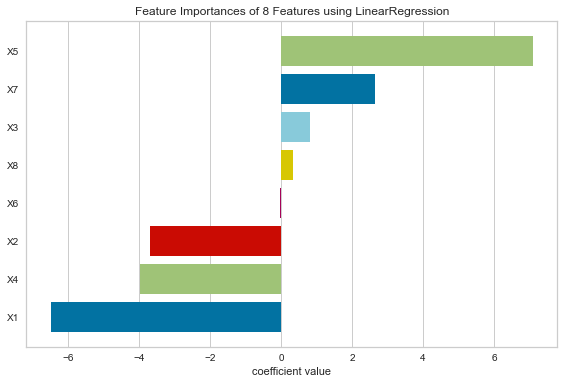

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LinearRegression'}, xlabel='coefficient value'>

In [220]:
from yellowbrick.model_selection import FeatureImportances

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train_1, y_train_1)
viz.show()

In [221]:
# Yes. As expected X1, X4, X2 and X5 are among the important features. And X6 is not an important feature.

### Predict y2

In [222]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y2, test_size=0.3, random_state=101)

In [223]:
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.fit_transform(X_test_2)

In [224]:
model = LinearRegression()

In [225]:
model.fit(X_train_2,y_train_2)

LinearRegression()

In [226]:
y_pred_2 = model.predict(X_test_2)

In [227]:
eval_metrics(y_test_2, y_pred_2)

r2_score: 0.8776833093315236 
 mae: 2.6125279630993754 
 mse: 10.859273784494402 
 rmse: 3.295341224288374


### Feature Importnce 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


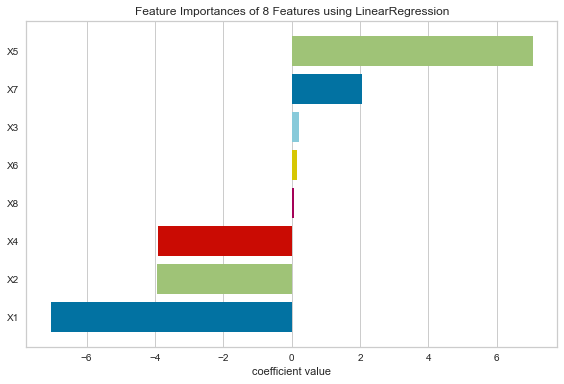

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LinearRegression'}, xlabel='coefficient value'>

In [228]:
from yellowbrick.model_selection import FeatureImportances

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train_2, y_train_2)
viz.show()

### 2. Random Forest Regressor

### Predict y1

In [244]:
from sklearn.ensemble import RandomForestRegressor

In [245]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y1, test_size=0.3, random_state=101)

In [246]:
rf_reg=RandomForestRegressor()
rf_reg.fit(X_train_1, y_train_1)

RandomForestRegressor()

In [247]:
y_pred_1 = rf_reg.predict(X_test_1)

In [248]:
eval_metrics(y_test_1, y_pred_1)

r2_score: 0.9982240230523782 
 mae: 0.28667298701298605 
 mse: 0.1759476511913411 
 rmse: 0.41946114383973765


In [ ]:
# Much better results than linear regression.

### Feature Importance 

In [249]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_}, 
                          index = X.columns)

<AxesSubplot:>

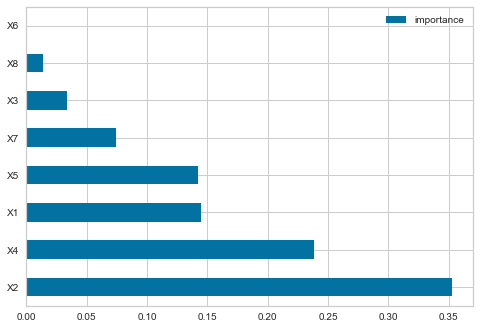

In [250]:
importance.sort_values(by="importance", ascending = False).head(10).plot.barh()

In [ ]:
# X2 is the most important feature for RF regressor to predict y1 (heating load)
# It is logical because X2 is surface area.

### Predict y2 (Cooling Load)

In [251]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y2, test_size=0.3, random_state=101)

In [252]:
rf_reg=RandomForestRegressor()
rf_reg.fit(X_train_2, y_train_2)

RandomForestRegressor()

In [253]:
y_pred_2 = rf_reg.predict(X_test_2)

In [254]:
eval_metrics(y_test_2, y_pred_2)

r2_score: 0.9745325275597106 
 mae: 0.9052264069264065 
 mse: 2.2610017841125494 
 rmse: 1.5036627893622125


### Feature Importance

In [255]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_}, 
                          index = X.columns)

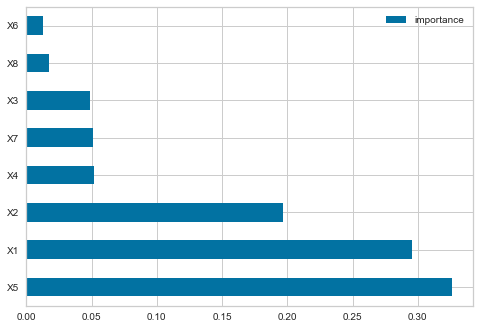

In [256]:
importance.sort_values(by="importance", ascending = False).head(10).plot.barh();

In [257]:
# X5 is the most important feature for RF regressor to predict y2 (cooling load)